In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
edges = pd.read_csv(r"data/edges.csv") #load the edges
edges = edges[["# source"," target"]] #remove additional columns
edges_array = np.array(edges) #convert it to np.array

In [6]:
G = nx.DiGraph() #empty DiGraph
G.add_edges_from(edges_array) 

Node_map = pd.read_csv(r"data/nodes.csv",index_col=False) #creating a dict with node index to names
Node_map = Node_map[["# index"," name"]]
Node_map = dict(Node_map)
Node_mapper = Node_map[" name"] #the main dict which can link node_index to actual names


In [7]:
print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges before data cleaning")

The graph has 58743 nodes and 108399 edges before data cleaning


In [8]:
#remove all nodes connecting to package 1, as it's empty
G.remove_node(1)

In [9]:
print(f"After removing node 1 we have {G.number_of_edges()} edges left")

After removing node 1 we have 72252 edges left


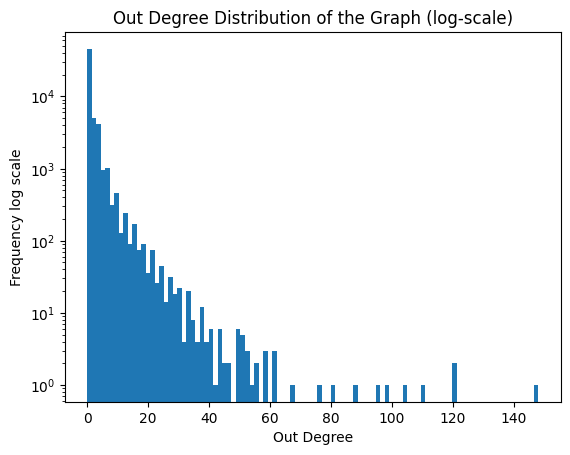

In [10]:
#drawing a out degree distribution
degree_dict_out = dict(G.out_degree())
vals_out = degree_dict_out.values()


plt.hist(vals_out,bins=100,log=True)
plt.xlabel("Out Degree")
plt.ylabel("Frequency log scale")
plt.title("Out Degree Distribution of the Graph (log-scale)")
plt.show()

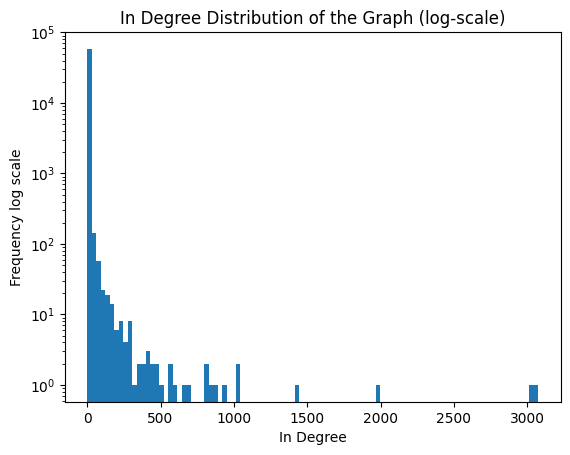

In [11]:
#drawing a in degree distribution
degree_dict_in = dict(G.in_degree())
vals_in = degree_dict_in.values()

plt.hist(vals_in,bins=100,log=True)
plt.xlabel("In Degree")
plt.ylabel("Frequency log scale")
plt.title("In Degree Distribution of the Graph (log-scale)")
plt.show()

In [12]:
Node_mapper[57]

'distribute'

In [13]:
print(f"There are {nx.number_of_selfloops(G)} self loops in the network")

There are 75 self loops in the network


In [14]:
degree_dict_in.values()

dict_values([0, 75, 9, 20, 691, 126, 605, 564, 3074, 1436, 65, 229, 55, 434, 76, 72, 812, 2, 124, 41, 233, 1987, 96, 20, 572, 817, 153, 673, 364, 856, 868, 1043, 0, 136, 16, 468, 444, 474, 306, 253, 25, 7, 387, 10, 63, 27, 928, 284, 52, 408, 5, 1, 1, 375, 55, 2, 5, 8, 29, 2, 3, 174, 0, 1045, 0, 10, 0, 11, 2, 7, 3013, 144, 119, 50, 6, 37, 48, 4, 3, 1, 71, 53, 0, 85, 8, 0, 65, 5, 34, 11, 6, 9, 0, 0, 19, 11, 0, 6, 1, 2, 2, 3, 1, 2, 3, 1, 2, 2, 1, 1, 2, 15, 2, 116, 275, 359, 1, 0, 33, 76, 50, 152, 2, 0, 8, 0, 0, 0, 17, 0, 0, 0, 304, 24, 11, 10, 4, 0, 0, 176, 76, 25, 61, 3, 2, 6, 0, 3, 35, 298, 232, 171, 0, 35, 112, 29, 20, 101, 0, 187, 96, 6, 68, 132, 198, 274, 190, 136, 289, 135, 280, 43, 181, 234, 18, 155, 271, 17, 41, 69, 65, 36, 3, 0, 0, 2, 4, 7, 2, 430, 36, 154, 15, 287, 127, 175, 0, 0, 12, 3, 9, 1, 3, 0, 0, 1, 44, 71, 131, 22, 18, 296, 4, 499, 103, 204, 1, 1, 0, 2, 0, 23, 430, 65, 24, 26, 11, 161, 123, 167, 25, 38, 47, 2, 13, 29, 93, 90, 50, 0, 1, 7, 2, 1, 0, 0, 0, 1, 6, 58, 29, 243,

In [20]:
# Reversing graph in order to use it for virus spreading
G_reverse = G.reverse()

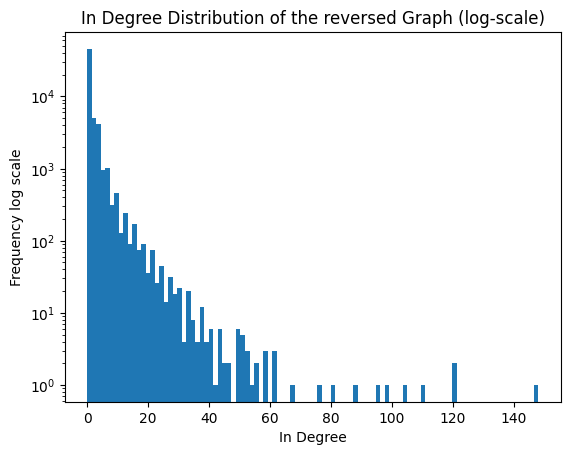

In [22]:
#drawing a in degree distribution
degree_dict_in = dict(G_reverse.in_degree())
vals_in = degree_dict_in.values()

plt.hist(vals_in,bins=100,log=True)
plt.xlabel("In Degree")
plt.ylabel("Frequency log scale")
plt.title("In Degree Distribution of the reversed Graph (log-scale)")
plt.show()

In [28]:
nx.write_edgelist(G_reverse, "data/edges_updated_reversed.csv")

72225